# Preparativos

Primero cargamos los datos y los guardamos en una variable secundaria, cosa que no tengamos que volverlos a cargar

In [ ]:
import pandas as pd
import numpy as np
import datetime
from os import path
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os.path as path

In [ ]:
camino_tender_2018 = path.join("Datos y trabajo con muestras",'tenderers_2018.xlsx')
df_tenderer_2018 = pd.read_excel(camino_tender_2018)
camino_tenderer_2021 = path.join("Datos y trabajo con muestras",'tenderers_2021.xlsx')
df_tenderer_2021 = pd.read_excel(camino_tenderer_2021)


In [ ]:
camino_award_2018 = path.join("Datos y trabajo con muestras",'awards_2018.xlsx')
df_award_2018 =pd.read_excel(camino_award_2018)
camino_award_2021 = path.join("Datos y trabajo con muestras",'awards_2021.xlsx')
df_award_2021 = pd.read_excel(camino_award_2021)

In [ ]:
df_award_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69587 entries, 0 to 69586
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   _link_x                              69587 non-null  object        
 1   initiationType                       69587 non-null  object        
 2   tender_id                            69587 non-null  object        
 3   procurement_details                  69188 non-null  object        
 4   tender_status                        69587 non-null  object        
 5   procurementMethod                    69587 non-null  object        
 6   tender_hasEnquiries                  69587 non-null  bool          
 7   tender_awardPeriod_endDate           69587 non-null  datetime64[ns]
 8   tender_awardPeriod_startDate         69587 non-null  datetime64[ns]
 9   tender_awardPeriod_durationInDays    69587 non-null  float64       
 10  tender_ten

In [ ]:
df_award_2018["procurementMethod"] =df_award_2018["procurementMethod"].astype("category")
df_award_2018["tender_status"] =df_award_2018["tender_status"].astype("category")
df_award_2018["initiationType"] =df_award_2018["initiationType"].astype("category")
df_award_2018["buyer_region"] =df_award_2018["buyer_region"].astype("category")

In [ ]:
df_award_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278419 entries, 0 to 278418
Data columns (total 43 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   _link_x                              278419 non-null  object        
 1   tender_id                            278419 non-null  object        
 2   initiationType                       278419 non-null  object        
 3   tender_id.1                          278419 non-null  object        
 4   procurement_details                  277084 non-null  object        
 5   tender_status                        278419 non-null  object        
 6   procurementMethod                    278419 non-null  object        
 7   tender_hasEnquiries                  278419 non-null  bool          
 8   tender_awardPeriod_endDate           278419 non-null  datetime64[ns]
 9   tender_awardPeriod_startDate         278419 non-null  datetime64[ns]
 

In [ ]:
df_award_2021.drop(columns=["_link_y", "_link_main_x"], inplace=True)

In [ ]:
df_award_2021["procurementMethod"] =df_award_2021["procurementMethod"].astype("category")
df_award_2021["tender_status"] =df_award_2021["tender_status"].astype("category")
df_award_2021["initiationType"] =df_award_2021["initiationType"].astype("category")
df_award_2021["buyer_region"] =df_award_2021["buyer_region"].astype("category")

In [ ]:
df_tenderer_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110996 entries, 0 to 110995
Data columns (total 35 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   initiationType                       110996 non-null  object        
 1   tender_id                            110996 non-null  object        
 2   procurement_details                  110618 non-null  object        
 3   tender_status                        110996 non-null  object        
 4   procurementMethod                    110996 non-null  object        
 5   tender_hasEnquiries                  110996 non-null  bool          
 6   tender_awardPeriod_endDate           110996 non-null  datetime64[ns]
 7   tender_awardPeriod_startDate         110996 non-null  datetime64[ns]
 8   tender_awardPeriod_durationInDays    110996 non-null  float64       
 9   tender_tenderPeriod_endDate          110996 non-null  datetime64[ns]
 

In [ ]:
df_tenderer_2018["procurementMethod"] =df_tenderer_2018["procurementMethod"].astype("category")
df_tenderer_2018["sector"] =df_tenderer_2018["sector"].astype("category")
df_tenderer_2018["tender_status"] =df_tenderer_2018["tender_status"].astype("category")
df_tenderer_2018["procurement_details"] =df_tenderer_2018["procurement_details"].astype("category")
df_tenderer_2018["initiationType"] =df_tenderer_2018["initiationType"].astype("category")

In [ ]:
df_tenderer_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439674 entries, 0 to 439673
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   _link                                439674 non-null  object        
 1   tender_id                            439674 non-null  object        
 2   initiationType                       439674 non-null  object        
 3   tender_id.1                          439674 non-null  object        
 4   procurement_details                  438259 non-null  object        
 5   tender_status                        439674 non-null  object        
 6   procurementMethod                    439674 non-null  object        
 7   tender_hasEnquiries                  439674 non-null  bool          
 8   tender_awardPeriod_endDate           439674 non-null  datetime64[ns]
 9   tender_awardPeriod_startDate         439674 non-null  datetime64[ns]
 

In [ ]:
df_tenderer_2021["procurementMethod"] =df_tenderer_2021["procurementMethod"].astype("category")
df_tenderer_2021["sector"] =df_tenderer_2021["sector"].astype("category")
df_tenderer_2021["tender_status"] =df_tenderer_2021["tender_status"].astype("category")
df_tenderer_2021["procurement_details"] =df_tenderer_2021["procurement_details"].astype("category")
df_tenderer_2021["initiationType"] =df_tenderer_2021["initiationType"].astype("category")

In [ ]:
award_2018 =df_award_2018
award_2021 = df_award_2021
tenderer_2018 = df_tenderer_2018
tenderer_2021 = df_tenderer_2021

# Preguntas

1.- ¿Existe una correlación entre el monto adjudicado y el tipo de procedimiento de licitación utilizado?

2.- ¿Hay factores que afectan la cantidad de oferentes en una licitación?, ¿Cuáles son?

3.- ¿Qué tipo de servicio estatal tiene mejor respuesta del mercado frente a sus licitaciones?

4.- ¿Qué tipo de area estatal muestran similitudes en cuanto a montos, cantidad de ofertas, y fechas de las licitaciones que realiza?

5.- ¿Cómo se distribuyen geográficamente las contrataciones públicas según el tipo de licitación?

### Primera pregunta.

Para responder esta pregunta se debe usarán los dataframes awards, la columna "procurementMethod" como tipo de procedimiento de licitación, no se utilizará "procurement_details" puesto que esta columna tiene una directa relación con el monto adjudicado, como monto se utilizará "value_amount" de las licitaciones en CLP, para ver si existe una relción entre ambos valores se procederá a realizar pairplots.

In [ ]:
df_p1_2018 = award_2018[["procurementMethod", "value_amount"]]
sns.pairplot(df_p1_2018)

In [ ]:
df_p1_2021 = award_2021[["procurementMethod", "value_amount"]]
sns.pairplot(df_p1_2021)

In [ ]:
df_p1 = pd.concat([df_p1_2021, df_p1_2018])

### Segunda pregunta

Para responder a esta pregunta haremos un pair plot para cada variable de los dataframes awards y tenderers, exceptuando is_supplier puesto que este valor depende de si hay o no ofertante y las columnas comunes entre los dataframe que se utilizarán solo una vez, y observaremos si hay alguna relación tentativa, en base a estas observaciones crearemos una matríz de correlación que graficaremos en un heatmap y teniendo esta información intentaremos plantear un predictor de duración de licitaciones.

### Tercera Pregunta

Para responder esta pregunta se usara la información de tenderers, como valor de servicio estatal se utilizará la columna <sector> y como indicador de respuesta, la cantidad de tenderers <Has_tender> y la cantidad de suppliers <is_supplier> ,la cantidad de licitaciones del tipo selective en <procurementMethod> y el tipo en <procurement_details>, puesto que según el reglamento de la ley 19886 articulo 10, las licitaciones de tipo privada/selective ocurren cuando no sepresentan concursantes al llamado de licitación pública/open, se utilizarán countplots y tablas de datos agrupados para cada valor a revisarse, se revisaran los valores para cada año, y se buscará establecer una generalidad para ambos, en caso de no ser posible se entregarán respuestas por cada año.

### Cuarta Pregunta

Se utilizarán la columna "sector", para determinar el área estatal de cada licitación, "tender_tenderPeriod_startDate" para la fecha de inicio de la licitación y "value_amount" como monto, se utilizará groupby y counplots/barplots para revisar patrones, se buscará plantear una respuesta general para los años revisados, en caso de no ser posible se dará una respuesta para cada año y un contraste entre los patrones.

In [ ]:
award_2018.head(7)

,_link_x,initiationType,tender_id,procurement_details,tender_status,procurementMethod,tender_hasEnquiries,tender_awardPeriod_endDate,tender_awardPeriod_startDate,tender_awardPeriod_durationInDays,...,value_monetary_unit,id,quantity,unit_name,unit_value_amount,classification_id,unit_value_monetary_unit,Nombre Segmento,Código Producto,Nombre Producto
0,id-0.0,tender,4548-142-L117,L1,complete,open,False,2017-12-15 18:05:00,2017-12-13 09:03:00,2.376389,...,CLP,36425198.0,1.0,Unidad,690000.0,60141012.0,CLP,"Instrumentos Musicales, Juegos, Juguetes, Arte...",60141012.0,Juguetes inflables
1,id-0.1,tender,2409-1129-L117,L1,unsuccessful,open,False,2018-01-25 11:35:00,2017-12-26 15:31:00,29.836111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id-0.2,tender,2961-811-L117,L1,complete,open,False,2018-02-02 19:38:00,2018-01-02 17:00:00,31.109722,...,CLP,36451829.0,1.0,Unidad,870000.0,30171501.0,CLP,"Componentes y Suministros para Estructuras, Ed...",30171501.0,Puertas de cristal
3,id-0.3,tender,4858-195-L117,L1,unsuccessful,open,False,2017-12-26 15:53:00,2017-12-21 10:03:00,5.243056,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,id-0.4,tender,2409-975-LE17,LE,complete,open,True,2017-12-14 16:55:00,2017-12-11 16:30:00,3.017361,...,CLP,36342031.0,1.0,Unidad,6000000.0,86141501.0,CLP,Servicios Educativos y de Formación,86141501.0,Servicios de asesorías educativas
5,id-0.5,tender,4834-32-L117,L1,complete,open,True,2017-12-29 16:00:00,2017-12-28 12:02:00,1.165278,...,CLP,36460630.0,4.0,Unidad,4995.0,30102201.0,CLP,"Componentes y Suministros para Estructuras, Ed...",30102201.0,Placa de aleación ferrosa
6,id-0.5,tender,4834-32-L117,L1,complete,open,True,2017-12-29 16:00:00,2017-12-28 12:02:00,1.165278,...,CLP,36460632.0,4.0,Kit,4538.0,49161604.0,CLP,"Equipos, Suministros y Accesorios para Deporte...",49161604.0,Pelotas de tenis


In [ ]:
award_2018.columns

Index(['_link_x', 'initiationType', 'tender_id', 'procurement_details',
       'tender_status', 'procurementMethod', 'tender_hasEnquiries',
       'tender_awardPeriod_endDate', 'tender_awardPeriod_startDate',
       'tender_awardPeriod_durationInDays', 'tender_tenderPeriod_endDate',
       'tender_tenderPeriod_startDate', 'tender_tenderPeriod_durationInDays',
       'tender_enquiryPeriod_endDate', 'tender_enquiryPeriod_startDate',
       'tender_enquiryPeriod_durationInDays', 'estimated_cost',
       'estimated_cost_monetary_unit', 'buyer_id', 'buyer_name',
       'buyer_region', 'identifier_id', 'buyer_legalName', 'sector',
       'Codigo Unidad de Compra', 'Unidad de Compra', '_link_y',
       '_link_main_x', 'date', 'status', 'value_amount', 'value_monetary_unit',
       'id', 'quantity', 'unit_name', 'unit_value_amount', 'classification_id',
       'unit_value_monetary_unit', 'Nombre Segmento', 'Código Producto',
       'Nombre Producto'],
      dtype='object')

In [ ]:
df_necesario_monto = award_2018[['tender_id', 'value_amount','unit_value_monetary_unit',"sector"]]
df_necesario_monto = df_necesario_monto.loc[df_necesario_monto['unit_value_monetary_unit'] == "CLP"]
df_necesario_monto.drop_duplicates(keep="first", inplace=True)
df_necesario_monto.dropna(inplace=True)

array([  690000.,   870000.,  6000000., ..., 92418000.,  1245050.,
         441071.])

In [ ]:
df_sector_2018_monto_total = df_necesario_monto.groupby(by="sector").agg({"value_amount":"sum"}).reset_index()
df_sector_2018_monto_total.rename(columns={"value_amount": "amount_total_2018"}, inplace=True)

In [ ]:
df_sector_2018_monto_media = df_necesario_monto.groupby(by="sector").agg({"value_amount":"mean"}).reset_index()
df_sector_2018_monto_media.rename(columns={"value_amount": "amount_2018_media"}, inplace=True)

In [ ]:
df_necesario_monto_21 = award_2021[['tender_id', 'value_amount','unit_value_monetary_unit',"sector"]]
df_necesario_monto_21 = df_necesario_monto_21.loc[df_necesario_monto_21['unit_value_monetary_unit'] == "CLP"]
df_necesario_monto_21.drop_duplicates(keep="first", inplace=True)
df_necesario_monto_21.dropna(inplace=True)

In [ ]:
df_sector_2021_monto_total = df_necesario_monto_21.groupby(by="sector").agg({"value_amount":"sum"}).reset_index()
df_sector_2021_monto_total.rename(columns={"value_amount": "amount_total_2021"}, inplace=True)

In [ ]:
df_sector_2021_monto_media = df_necesario_monto_21.groupby(by="sector").agg({"value_amount":"mean"}).reset_index()
df_sector_2021_monto_media.rename(columns={"value_amount": "amount_2021_media"}, inplace=True)

In [ ]:
df_monto_sector_media = df_sector_2018_monto_media.merge(df_sector_2021_monto_media, on="sector")
df_monto_sector_total = df_sector_2018_monto_total.merge(df_sector_2021_monto_total, on="sector")
df_sector_monto = df_monto_sector_media.merge(df_monto_sector_total, on="sector")
df_sector_monto["amount_2018_media"] = df_sector_monto["amount_2018_media"].astype("float")
df_sector_monto["amount_2021_media"] = df_sector_monto["amount_2021_media"].astype("float")
df_sector_monto["amount_total_2018"] = df_sector_monto["amount_total_2018"].astype("float")
df_sector_monto["amount_total_2021"] = df_sector_monto["amount_total_2021"].astype("float")

In [ ]:
df_sector_monto

,sector,amount_2018_media,amount_2021_media,amount_total_2018,amount_total_2021
0,FFAA,8.305159e+06,3.357472e+12,1.078010e+10,1.542087e+16
1,"GOB. CENTRAL, UNIVERSIDADES",2.134754e+12,3.910448e+10,4.192657e+15,2.787759e+14
2,LEGISLATIVO Y JUDICIAL,1.118787e+07,9.059095e+06,1.857186e+09,2.074533e+09
3,MUNICIPALIDADES,1.074644e+10,1.510406e+11,1.174156e+14,3.780093e+15
4,OBRAS P�BLICAS,6.708189e+07,9.115376e+07,3.669379e+10,1.602483e+11
5,OTROS,1.107623e+07,1.995570e+08,2.248474e+09,8.441259e+10
6,SALUD,4.156408e+07,3.320780e+07,1.025801e+11,3.172673e+11


### Quinta pregunta

Se utilizarán datos de <https://www.bcn.cl/siit/mapas_vectoriales/index_html> para armar mapas de calor de la cantidad de licitaciones de los tipos presentes en <procurement_details> realizadas por región de Chile <buyer_region> según cada año y en conjunto.

In [ ]:
import geopandas as gp

In [ ]:
camino_comunas = path.join("Datos y trabajo con muestras","regiones", "Regional.shp")
df_regiones = gp.read_file(camino_comunas, driver='SHP')
df_regiones

,objectid,cir_sena,codregion,area_km,st_area_sh,st_length_,Region,geometry
0,1084,1,15,16866.819844,1.886869e+10,7.505296e+05,Región de Arica y Parinacota,"POLYGON ((-7727277.278 -1997230.768, -7726464...."
1,1085,2,1,42284.567484,4.830637e+10,1.213713e+06,Región de Tarapacá,"MULTIPOLYGON (((-7810213.515 -2298008.280, -78..."
2,1086,3,2,126071.431981,1.508452e+11,2.516112e+06,Región de Antofagasta,"MULTIPOLYGON (((-7870470.961 -2985679.186, -78..."
3,1087,15,12,133053.142345,3.581316e+11,9.049830e+07,Región de Magallanes y Antártica Chilena,"MULTIPOLYGON (((-7494057.535 -7542535.383, -74..."
4,1088,14,11,106703.377369,2.242743e+11,4.144481e+07,Región de Aysén del Gral.Ibañez del Campo,"MULTIPOLYGON (((-8413517.696 -6234055.255, -84..."
5,1089,4,3,75661.248635,9.643906e+10,2.401741e+06,Región de Atacama,"MULTIPOLYGON (((-7932747.769 -3311218.615, -79..."
6,1090,5,4,40575.901682,5.498082e+10,2.065933e+06,Región de Coquimbo,"MULTIPOLYGON (((-7963268.900 -3784870.143, -79..."
7,1091,6,5,16322.970393,2.301475e+10,1.679609e+06,Región de Valparaíso,"MULTIPOLYGON (((-8991645.917 -3991821.789, -89..."
8,1092,7,13,15392.030737,2.225204e+10,1.064253e+06,Región Metropolitana de Santiago,"POLYGON ((-7873736.745 -3885505.642, -7873695...."
9,1093,13,10,48408.371357,8.771834e+10,7.874158e+06,Región de Los Lagos,"MULTIPOLYGON (((-8331768.181 -5403721.402, -83..."


#### 2018

In [ ]:
award_2018["procurement_details"].unique()

array(['L1', 'LE', 'LP', 'LR', 'LQ', nan, 'B2', 'H2', 'LS'], dtype=object)

In [ ]:
award_2018["buyer_region"] = award_2018["buyer_region"].astype("string")

In [ ]:
award_2018["buyer_region"].unique()

<StringArray>
[                           'Región de Valparaíso ',
                               'Región del Biobío ',
                 'Región Metropolitana de Santiago',
                             'Región de los Lagos ',
                     'Región de Arica y Parinacota',
           'Región de Magallanes y de la Antártica',
                                'Región del Maule ',
                               'Región de Los Ríos',
                          'Región de la Araucanía ',
 'Región del Libertador General Bernardo O´Higgins',
                               'Región de Atacama ',
                             'Región de Tarapacá  ',
 'Región Aysén del General Carlos Ibáñez del Campo',
                           'Región de Antofagasta ',
                              'Región de Coquimbo ',
                                               <NA>]
Length: 16, dtype: string

In [ ]:
df_5_2018 = award_2018.dropna(subset=["procurement_details", "buyer_region"])
df_5_2021 = award_2021.dropna(subset=["procurement_details", "buyer_region"])
df_p5 = pd.concat([df_5_2018, df_5_2021])

In [ ]:
dic_regiones ={'Región de Valparaíso ': 5,'Región del Biobío ':8, 'Región Metropolitana de Santiago':13,'Región de los Lagos ':10,'Región de Arica y Parinacota':15,'Región de Magallanes y de la Antártica':12, 'Región del Maule ':7,'Región de Los Ríos':14,'Región de la Araucanía ':9,'Región del Libertador General Bernardo O´Higgins':6,'Región de Atacama ':3,'Región de Tarapacá  ':1,'Región Aysén del General Carlos Ibáñez del Campo':11,
                           'Región de Antofagasta ':2,'Región de Coquimbo ':4}

df_L1_2018 = df_p5.loc[df_p5["procurement_details"] == "L1"][["buyer_region"]]
df_L1_2018["numero_region"] = df_L1_2018["buyer_region"].map(dic_regiones)

df_LE_2018 = df_p5.loc[df_p5["procurement_details"] == "LE"][["buyer_region"]]
df_LE_2018["numero_region"] = df_LE_2018["buyer_region"].map(dic_regiones)

df_LP_2018 = df_p5.loc[df_p5["procurement_details"] == "LP"][["buyer_region"]]
df_LP_2018["numero_region"] = df_LP_2018["buyer_region"].map(dic_regiones)

df_LR_2018 = df_p5.loc[df_p5["procurement_details"] == "LR"][["buyer_region"]]
df_LR_2018["numero_region"] = df_LR_2018["buyer_region"].map(dic_regiones)

df_LQ_2018 = df_p5.loc[df_p5["procurement_details"] == "LQ"][["buyer_region"]]
df_LQ_2018["numero_region"] = df_LQ_2018["buyer_region"].map(dic_regiones)

df_B2_2018 = df_p5.loc[df_p5["procurement_details"] == "B2"][["buyer_region"]]
df_B2_2018["numero_region"] = df_B2_2018["buyer_region"].map(dic_regiones)

df_H2_2018 = df_p5.loc[df_p5["procurement_details"] == "H2"][["buyer_region"]]
df_H2_2018["numero_region"] = df_H2_2018["buyer_region"].map(dic_regiones)

df_LS_2018 = df_p5.loc[df_p5["procurement_details"] == "LS"][["buyer_region"]]
df_LS_2018["numero_region"] = df_LS_2018["buyer_region"].map(dic_regiones)

In [ ]:
df_LQ_2018

,buyer_region,numero_region
64,Región de Valparaíso,5
98,Región Metropolitana de Santiago,13
99,Región Metropolitana de Santiago,13
100,Región Metropolitana de Santiago,13
129,Región Metropolitana de Santiago,13
...,...,...
69101,Región de los Lagos,10
69106,Región del Biobío,8
69369,Región del Biobío,8
69520,Región Metropolitana de Santiago,13


In [ ]:
l1_reg_18 = df_L1_2018.groupby("numero_region").count().reset_index()
le_reg_18 = df_LE_2018.groupby("numero_region").count().reset_index()
lp_reg_18 = df_LP_2018.groupby("numero_region").count().reset_index()
lr_reg_18 = df_LR_2018.groupby("numero_region").count().reset_index()
lq_reg_18 = df_LQ_2018.groupby("numero_region").count().reset_index()
b2_reg_18 = df_B2_2018.groupby("numero_region").count().reset_index()
h2_reg_18 = df_H2_2018.groupby("numero_region").count().reset_index()
ls_reg_18 = df_LS_2018.groupby("numero_region").count().reset_index()

In [ ]:
L1_2018 = df_regiones.merge(l1_reg_18, right_on="numero_region", left_on="codregion", how="left")
# reemplazar NaN por cero en la columna con cantidad.
LE_2018 = df_regiones.merge(le_reg_18, right_on="numero_region", left_on="codregion", how="left")
LP_2018 = df_regiones.merge(lp_reg_18, right_on="numero_region", left_on="codregion", how="left")
LR_2018 = df_regiones.merge(lr_reg_18, right_on="numero_region", left_on="codregion", how="left")
LQ_2018 = df_regiones.merge(lq_reg_18, right_on="numero_region", left_on="codregion", how="left")
B2_2018 = df_regiones.merge(b2_reg_18, right_on="numero_region", left_on="codregion", how="left")
H2_2018 = df_regiones.merge(h2_reg_18, right_on="numero_region", left_on="codregion", how="left")
LS_2018 = df_regiones.merge(ls_reg_18, right_on="numero_region", left_on="codregion", how="left")

In [ ]:
L1_2018

<Axes: >

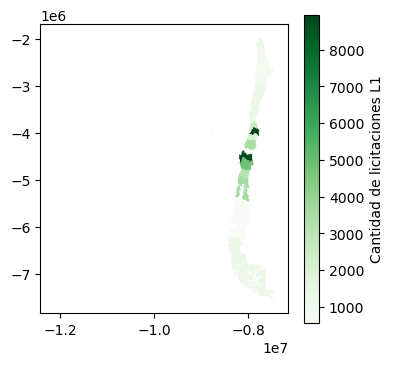

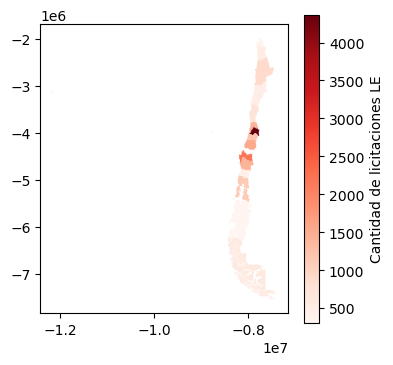

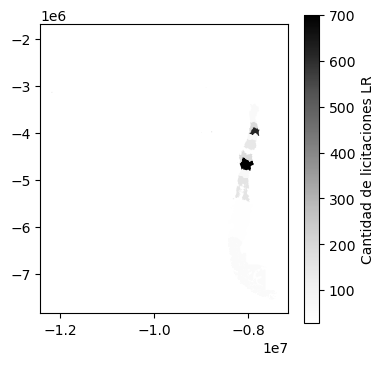

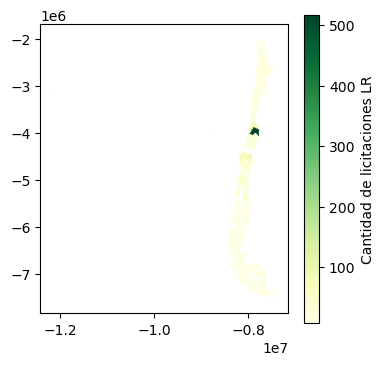

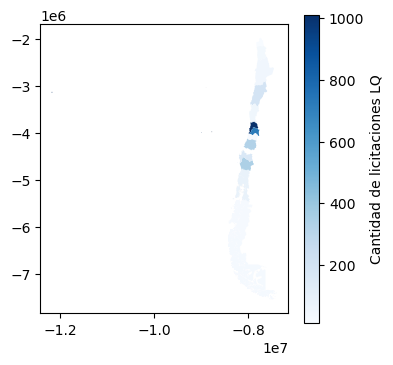

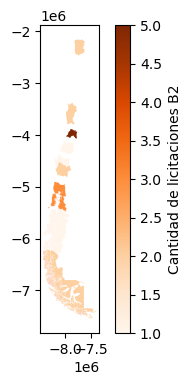

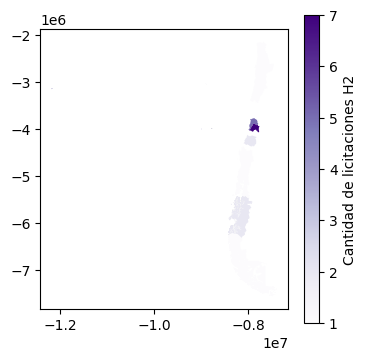

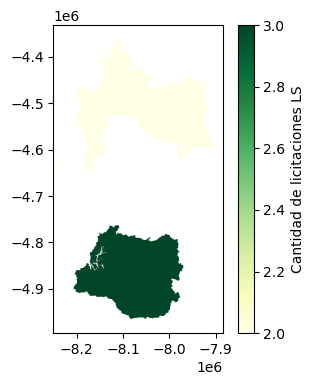

In [59]:

L1_2018 = L1_2018.set_index("objectid")
L1_2018.plot(figsize=(4,4), column='buyer_region', cmap='Greens', legend=True, legend_kwds={"label": "Cantidad de licitaciones L1"})
LE_2018 = LE_2018.set_index("objectid")
LE_2018.plot(figsize=(4,4), column='buyer_region', cmap='Reds', legend=True,legend_kwds={"label": "Cantidad de licitaciones LE"})
LP_2018 = LP_2018.set_index("objectid")
LP_2018.plot(figsize=(4,4), column='buyer_region', cmap='Grays', legend=True, legend_kwds={"label": "Cantidad de licitaciones LR"})
LR_2018 = LR_2018.set_index("objectid")
LR_2018.plot(figsize=(4,4), column='buyer_region', cmap="YlGn", legend=True, legend_kwds={"label": "Cantidad de licitaciones LR"})
LQ_2018 = LQ_2018.set_index("objectid")
LQ_2018.plot(figsize=(4,4), column='buyer_region', cmap='Blues', legend=True, legend_kwds={"label": "Cantidad de licitaciones LQ"})
B2_2018 = B2_2018.set_index("objectid")
B2_2018.plot(figsize=(4,4), column='buyer_region', cmap='Oranges', legend=True, legend_kwds={"label": "Cantidad de licitaciones B2"})
H2_2018 = H2_2018.set_index("objectid")
H2_2018.plot(figsize=(4,4), column='buyer_region', cmap='Purples', legend=True, legend_kwds={"label": "Cantidad de licitaciones H2"})
LS_2018 = LS_2018.set_index("objectid")
LS_2018.plot(figsize=(4,4), column='buyer_region', cmap='YlGn', legend=True, legend_kwds={"label": "Cantidad de licitaciones LS"})
